In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


METRICS = ['F1', 'NED', 'CER']
HIERTEXT_SCORES_PATH = Path(__file__).parent.parent / "evaluation" / "scores-hiertext"
SBERNOTES_SCORES_PATH = Path(__file__).parent.parent / "evaluation" / "scores-sbernotes"

In [3]:
def metrics_to_df(scores):
    mean_scores = np.mean(scores, axis=0).reshape(1, -1)
    metrics_df = pd.DataFrame(mean_scores, columns=METRICS)
    return metrics_df

In [4]:
def plot(scores, title, ax):
    n, bins, patches = ax.hist(scores, bins=100, color='skyblue', alpha=0.7, edgecolor='navy')

    std = np.std(scores)
    mean = np.mean(scores)
    median = np.median(scores)

    ax.vlines(mean - std, 0, max(n)*1.05, color='red', linestyle='--', linewidth=1.5, label='±1 std')
    ax.vlines(mean + std, 0, max(n)*1.05, color='red', linestyle='--', linewidth=1.5)
    ax.vlines(mean, 0, max(n)*1.05, color='blue', linewidth=2, label='Mean')

    ax.set_title(title)
    ax.grid(True, linestyle='--', alpha=0.6)


    stats_text = f'Mean: {mean:.2f}\nStd: {std:.2f}\nMedian: {median:.2f}'
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
            ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))

In [6]:
with open(HIERTEXT_SCORES_PATH, "r", encoding="utf-8") as file:
    hiertext_data = json.load(file)

with open(SBERNOTES_SCORES_PATH, "r", encoding="utf-8") as file:
    sbernotes_data = json.load(file)

hiertext_scores = np.array(hiertext_data)
sbernotes_scores = np.array(sbernotes_data)

In [7]:
hiertext_metrics = metrics_to_df(hiertext_scores)

In [8]:
sbernotes_metrics = metrics_to_df(sbernotes_scores)

In [13]:
result = pd.concat([hiertext_metrics, sbernotes_metrics])
result.index = ["Hiertext", "Sbernotes"]

print("Полученные усредненные метрики:\n")
result

Полученные усредненные метрики:



,F1,NED,CER
Hiertext,0.810884,0.654786,3.433304
Sbernotes,0.674605,0.767232,0.846915


Распределения для Hiertext:



<Figure size 1800x500 with 0 Axes>

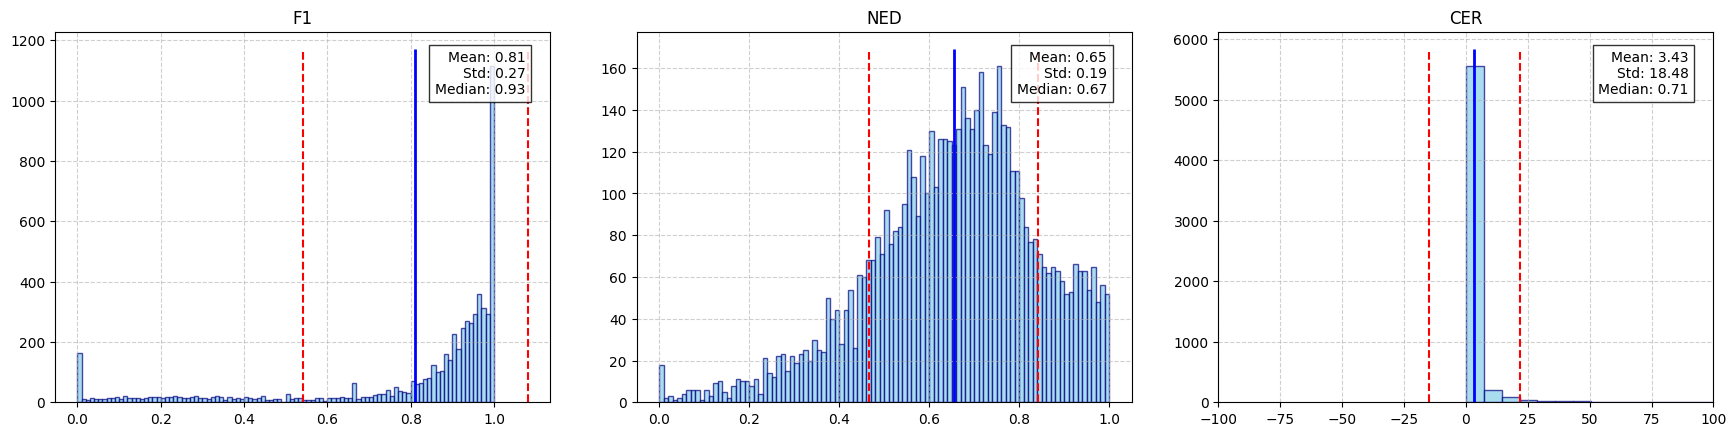

In [14]:
plt.figure(figsize=(18, 5))
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, metric_name in enumerate(METRICS):
    values = hiertext_scores[:, i]
    plot(values, metric_name, ax[i])
    if metric_name == "CER":
        ax[i].set_xlim(-100, 100)

print("Распределения для Hiertext:\n")
plt.tight_layout(pad=3.0)
plt.show()

Распределения для Sbernotes:



<Figure size 1800x500 with 0 Axes>

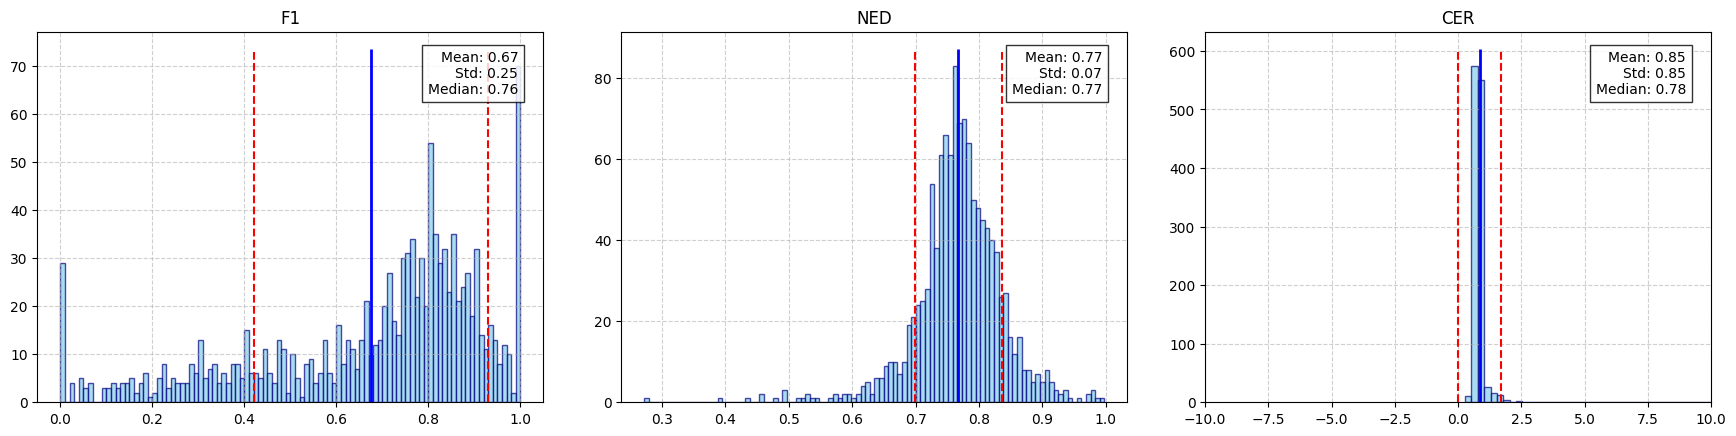

In [15]:
plt.figure(figsize=(18, 5))
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, metric_name in enumerate(METRICS):
    values = sbernotes_scores[:, i]
    plot(values, metric_name, ax[i])
    if metric_name == "CER":
        ax[i].set_xlim(-10, 10)

print("Распределения для Sbernotes:\n")
plt.tight_layout(pad=3.0)
plt.show()